# Pixel Search Algorithm in use

In [107]:
# Defining algorithm
import torch
import cv2 
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import cv2  # Optional: for reading images


def refine_keypoint(image, keypoint, x_true, y_true, x_guess, y_guess, window_size=11):
    """
    Refines the keypoint by searching for the brightest pixel in a local window.
    
    Args:
        image (numpy.ndarray): The grayscale input image.
        keypoint (tuple): Initial keypoint coordinates (x, y).
        window_size (int): The size of the search window (must be odd).
    
    Returns:
        tuple: Refined keypoint (x, y).
    """
    x, y = int(keypoint[0]), int(keypoint[1])
    half_w = window_size // 2

    # Extract search region (ensure it stays within image bounds)
    y_min, y_max = max(0, y - half_w), min(image.shape[0], y + half_w + 1)
    x_min, x_max = max(0, x - half_w), min(image.shape[1], x + half_w + 1)
    
    search_region = image[y_min:y_max, x_min:x_max]
    
    # Find non-black pixels
    non_black_pixels = np.argwhere(search_region > 0)  # Get (y, x) positions of non-black pixels
    if len(non_black_pixels) == 0:
        return keypoint  # No valid pixels, return original keypoint

    # Sort pixels by height (smallest y first) and brightness (highest value)
    sorted_pixels = sorted(non_black_pixels, key=lambda p: (p[0], -search_region[p[0], p[1]]))

    # Choose the highest (smallest y) and brightest pixel
    highest_pixel = sorted_pixels[0]
    refined_y_local, refined_x_local = highest_pixel  # Local coordinates
    refined_x = x_min + refined_x_local
    refined_y = y_min + refined_y_local

    print("Refined_pixel_value:", image[refined_x,refined_y])
    #print("True pixel value:", image[x_true, y_true])


    # Load an image
    image_open = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Plot image
    plt.figure(figsize=(25, 25))
    plt.imshow(image_open)  # Display the image
    # Plot points
    plt.scatter(x_min, y_min, color="blue", s=10, marker="o", label="Point 1")  # Red circle
    plt.scatter(x_max, y_max, color="blue", s=10, marker="x", label="Point 2")  # Blue X
    plt.scatter(x_true, y_true, color="green", s=10, marker="o") 
    plt.scatter(x_guess, y_guess, color="brown", s=10, marker="o")
    plt.scatter(refined_x, refined_y, color="red", s=10, marker="o")
    plt.axis("off")  # Hide axes
    plt.show()


    return refined_x, refined_y

# Example usage
'''image = cv2.imread("image.jpg", cv2.IMREAD_GRAYSCALE)  # Load grayscale image
initial_keypoint = (150, 120)  # Example initial keypoint from model
refined_keypoint = refine_keypoint(image, initial_keypoint)

print("Initial:", initial_keypoint)
print("Refined:", refined_keypoint)'''

'image = cv2.imread("image.jpg", cv2.IMREAD_GRAYSCALE)  # Load grayscale image\ninitial_keypoint = (150, 120)  # Example initial keypoint from model\nrefined_keypoint = refine_keypoint(image, initial_keypoint)\n\nprint("Initial:", initial_keypoint)\nprint("Refined:", refined_keypoint)'

In [ ]:
import pandas
df = pandas.read_csv("/Users/casperbakolesen/Desktop/Github/Dataprojekt/Kode/SDU Cloud/final_results_with_distance.csv")

/var/folders/tc/bhrl5rl13sn07_4rv7zvdqpc0000gn/T/ipykernel_42807/957403041.py:37: RuntimeWarning: overflow encountered in scalar negative
  sorted_pixels = sorted(non_black_pixels, key=lambda p: (p[0], -search_region[p[0], p[1]]))


Refined_pixel_value: 0


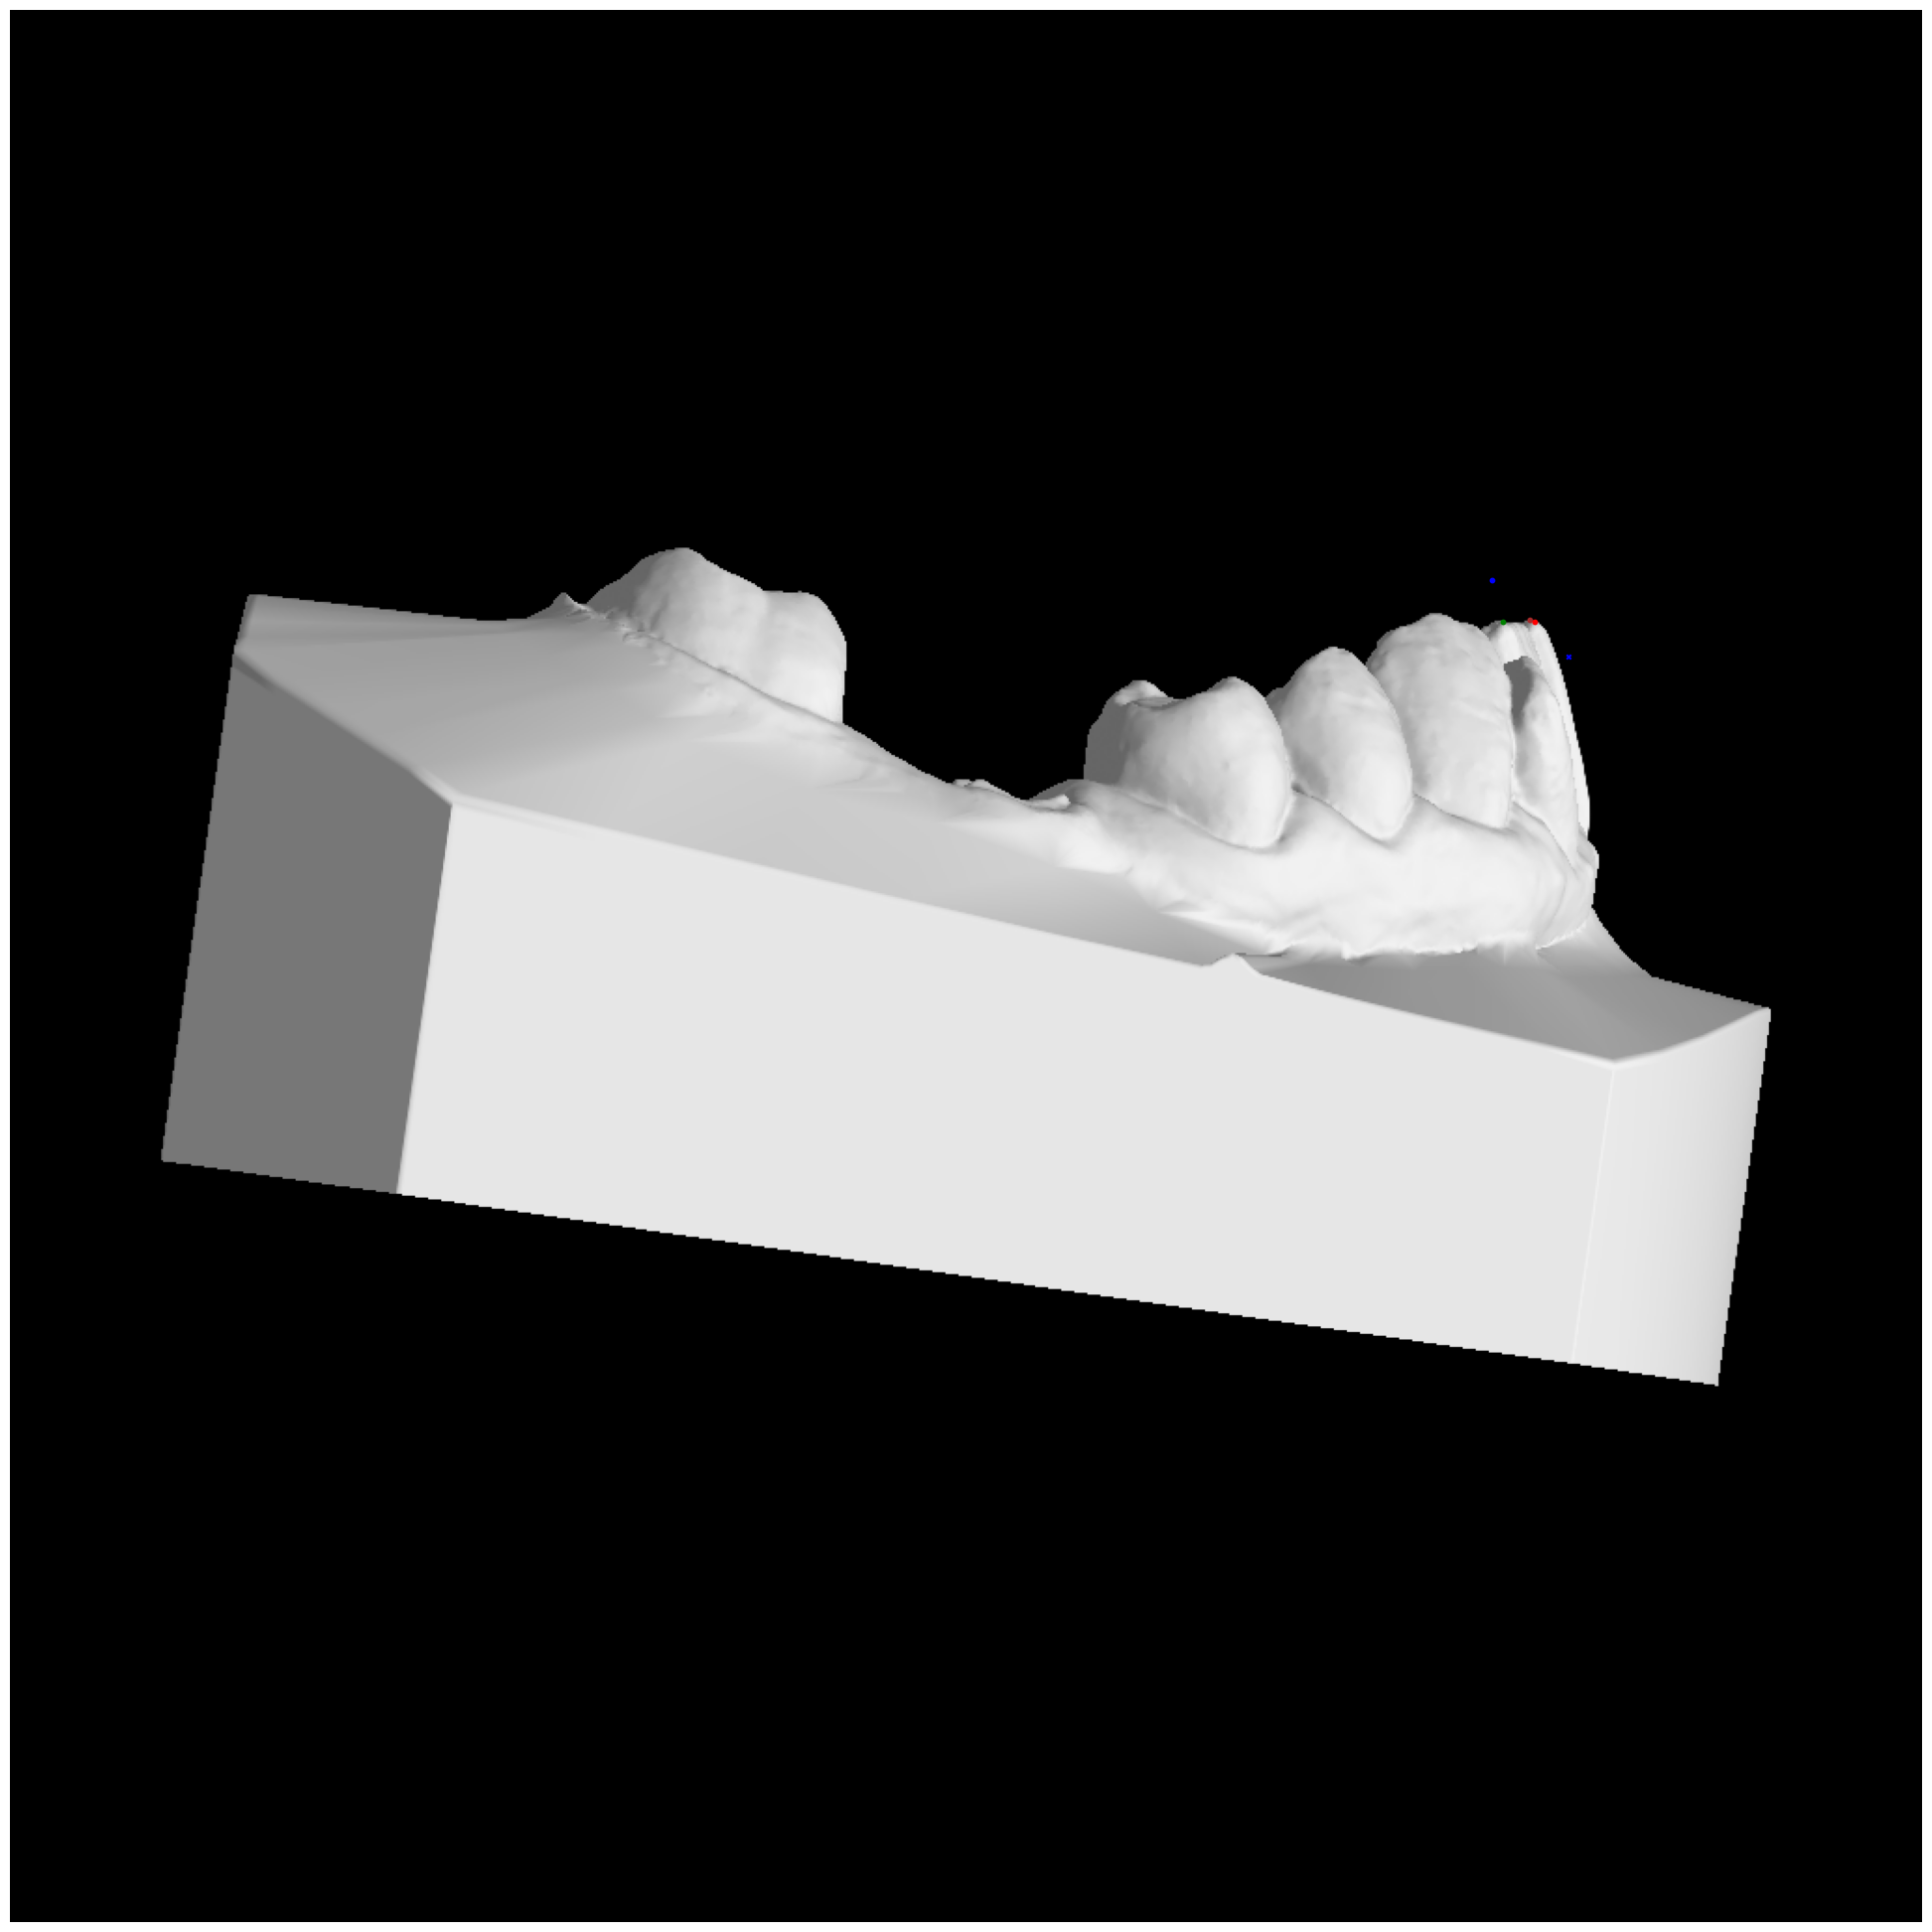

Initial: (813.4400024414062, 325.87701416015625)
Refined: (816, 327)
True (799.0, 327.0)


In [138]:
image1 = cv2.imread(f"/Users/casperbakolesen/Desktop/Github/Dataprojekt/Data/Clean Data/Overbite Data/Annotated Verification Data/{df["Filename"][0]}.png", cv2.IMREAD_GRAYSCALE)
keypoint1 = df["X_Model"][0], df["Y_Model"][0]
true_keypoint1 = df["X_True"][0], df["Y_True"][0]
guess_x, guess_y = keypoint1
true_x, true_y = true_keypoint1
refined_keypoint1 = refine_keypoint(image1, keypoint1, true_x, true_y, guess_x, guess_y, window_size=40)
print("Initial:", keypoint1)
print("Refined:", refined_keypoint1)
print("True", true_keypoint1)


In [119]:
print("Unique pixel values:", np.unique(image1))

Unique pixel values: [  0   1   2   3   4   5   6   7   8   9  11  13  18  24  26  29  31  32
  35  40  54  63  65  77  81  86 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236
 237 238 239 240 241 242]


In [120]:
image1 = cv2.normalize(image1, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)


In [140]:
pixel_values = []
length, _ = image1.shape
for i in range(length):
    for j in range(length):
        pixel_values.append(image1[i, j])

np.unique(pixel_values)
print(image1[800:820, 310:330])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
